In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_home ="data/majority_move/"

beta = 0.25
q=0.3
beta_str=str(np.round(beta, 2)).replace('.', '')
q_str=str(np.round(q, 1)).replace('.', '')
filename = f"2_regular_edgesize_5_beta_{beta_str}_q_{q_str}.csv"

In [4]:
filename

'2_regular_edgesize_5_beta_025_q_03.csv'

In [5]:
df = pd.read_csv(data_home + filename)


In [6]:
df.head()

,sample id,datatype,0,1,2,3,4,5,6,7,...,91,92,93,94,95,96,97,98,99,100
0,0,sum_opinion_A,500,500,527,507,518,520,538,538,...,581,583,584,582,581,584,574,583,584,584.0
1,0,binned_opinions_home,9 31 52 70 35 3,16 31 40 51 47 15,27 29 44 36 38 26,27 31 33 46 32 31,28 29 39 38 31 35,28 29 31 40 33 39,29 37 27 23 42 42,26 32 36 28 36 42,...,72 4 6 6 11 101,70 7 3 8 13 99,72 8 2 6 8 104,72 7 4 5 9 103,71 8 4 4 9 104,74 8 1 6 9 102,71 9 2 8 4 106,72 4 9 4 5 106,71 6 6 7 5 105,NaN
2,0,binned_opinions_wp,4 0 43 0 55 0 51 0 41 6,16 9 23 12 24 18 35 14 25 24,28 12 16 12 16 24 27 12 27 26,20 9 29 15 13 26 23 16 15 34,27 8 28 12 9 19 29 16 14 38,25 7 30 8 13 21 21 11 25 39,34 7 20 12 15 20 15 15 16 46,35 4 22 15 8 20 19 14 14 49,...,69 3 5 2 1 3 13 3 9 92,72 1 6 3 0 3 8 4 6 97,73 4 3 2 0 4 5 5 7 97,72 3 5 3 0 3 4 6 6 98,73 2 2 4 1 5 4 5 4 100,72 3 3 4 1 6 6 6 5 94,73 1 5 0 2 6 5 6 3 99,69 3 8 1 0 6 4 7 4 98,69 3 8 0 1 8 4 2 3 102,NaN
3,0,binned_edge_sizes_wp,0 0 0 0 0 200 0 0 0 0 0 0 0 0,0 0 0 10 47 90 42 9 1 1 0 0 0 0,0 0 0 13 55 71 44 15 1 1 0 0 0 0,0 0 0 18 57 64 37 16 8 0 0 0 0 0,0 0 2 16 60 59 41 10 11 1 0 0 0 0,0 0 3 17 56 62 33 21 8 0 0 0 0 0,0 0 1 19 63 54 31 26 3 3 0 0 0 0,0 0 5 21 51 57 37 19 7 3 0 0 0 0,...,0 0 9 42 43 35 23 25 15 6 0 2 0 0,0 0 9 45 40 37 19 24 17 7 1 1 0 0,0 0 11 40 45 32 23 24 16 7 1 1 0 0,0 0 13 38 43 35 21 25 17 5 2 1 0 0,0 0 15 37 42 34 23 24 15 6 3 1 0 0,0 0 14 38 42 33 25 24 14 6 3 1 0 0,0 0 16 35 42 36 22 26 11 8 3 1 0 0,0 0 14 37 43 35 22 27 10 8 3 1 0 0,0 0 14 37 43 35 19 31 10 7 4 0 0 0,NaN
4,1,sum_opinion_A,500,500,489,481,476,501,508,502,...,497,494,497,502,503,504,515,517,518,514.0


In [7]:
results={}

row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp']
iterations=300
for row_i,row in enumerate(row_names):
    results[row]=[]
    if row != 'sum_opinion_A':
        pdrow=list(df.iloc[[row_i]].values[0])
        for j in range(len(pdrow[2].split(' '))):
                results[row].append([])
                
    for i in range(iterations):
        pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
        if row != 'sum_opinion_A':
            for j,k in enumerate(pdrow[2].split(' ')):
                    results[row][j].append([])
            for item in pdrow[2:-1]:
                for j,k in enumerate(item.split(' ')):
                    results[row][j][i].append(int(k))
        else:
            try:
                results[row].append([int(item)for item in pdrow[2:-1]])
            except:
                print(i)
                break

## Time evolution of 'A' opinions 

In [8]:
fs=20
ts=15

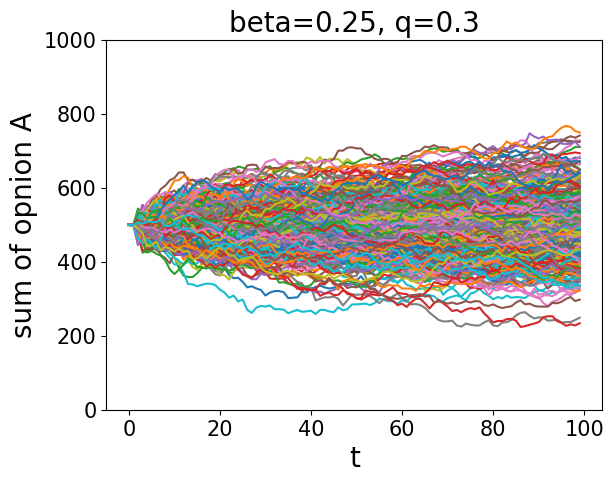

In [9]:
fig,ax=plt.subplots()
beta = 0.25
q=0.3
for i in range(iterations):
    ax.plot(results['sum_opinion_A'][i])
ax.set_ylabel('sum of opnion A',fontsize=fs)
ax.set_xlabel('t',fontsize=fs)
ax.set_title(f'{beta=}, {q=}',fontsize=fs)
ax.tick_params('both', labelsize=ts)
ax.set_ylim(0,1000)
plt.savefig('')
plt.show()

In [10]:
iterations

300

In [12]:
import scipy.stats

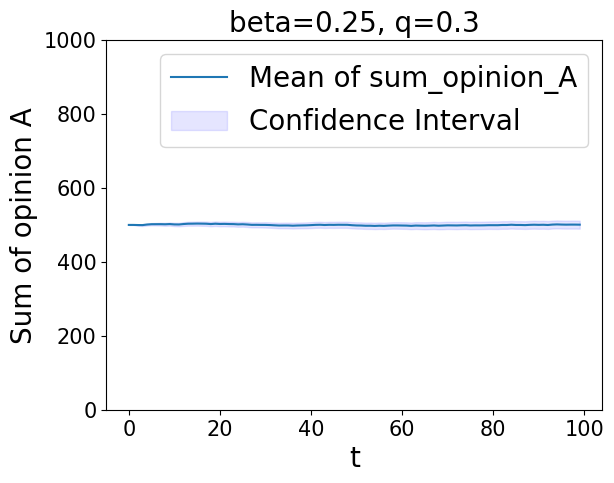

In [13]:
# Assuming `results['sum_opinion_A']` is a list of arrays where each array corresponds to an iteration
iterations = len(results['sum_opinion_A'])
t_steps = len(results['sum_opinion_A'][0])

# Convert to a NumPy array for easier calculations: shape (iterations, t_steps)
data = np.array(results['sum_opinion_A'])

# Calculate the mean and 95% confidence interval
mean_values = np.mean(data, axis=0)

conflev = 0.05
t_value = scipy.stats.t.ppf(1 - conflev / 2, iterations - 1)
ci = t_value * np.std(data, axis=0) / np.sqrt(iterations)
y_ci_lower=mean_values - ci
y_ci_upper=mean_values + ci


# Plotting
fig, ax = plt.subplots()
ax.plot(mean_values, label='Mean of sum_opinion_A')
ax.fill_between(range(t_steps), y_ci_lower, y_ci_upper, color='b', alpha=0.1, label='Confidence Interval')

# Labels and title
ax.set_ylabel('Sum of opinion A', fontsize=fs)
ax.set_xlabel('t', fontsize=fs)
ax.set_title(f'{beta=}, {q=}', fontsize=fs)
ax.tick_params('both', labelsize=ts)
ax.set_ylim(0,1000)

# Legend
ax.legend(fontsize=fs)

# Show plot
plt.show()


In [14]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [15]:
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

#color pinterest
S_color=(inter_from_256(231),inter_from_256(197),inter_from_256(108))
I_color=(inter_from_256(189),inter_from_256(108),inter_from_256(78))
SI_color=(inter_from_256(86),inter_from_256(141),inter_from_256(162))
colors=[S_color,I_color,SI_color]

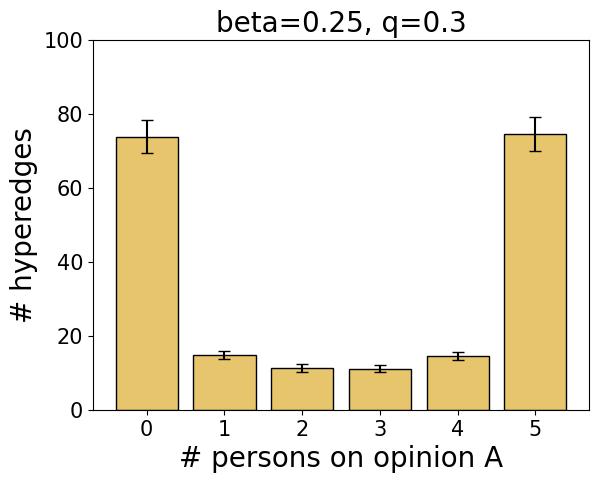

In [16]:
data_mean=[]
data_error=[]

fig, ax = plt.subplots()
ax.set_title(f'{beta=}, {q=}',fontsize=fs)
for i in range(len(results['binned_opinions_home'])):
    data=[results['binned_opinions_home'][i][it][-1] for it in range(iterations)]
    m =mean_confidence_interval(data,0.95)
    data_mean.append(m[0])
    data_error.append(2*m[1])
ax.bar(np.arange(len(results['binned_opinions_home'])), data_mean, 0.8, label=None, color=colors[0],edgecolor = 'black',yerr=data_error, capsize=4,)
# Customize the second subplot
ax.set_xticks(np.arange(len(results['binned_opinions_home'])))
ax.set_ylabel(r'# hyperedges', fontsize=fs)
ax.set_xlabel(r'# persons on opinion A', fontsize=fs)
ax.tick_params(axis='both', labelsize=ts)# Example categories
ax.set_ylim(0,100)
plt.show()


In [33]:
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,0.8,0.1)

In [34]:
qs

array([0.3, 0.4, 0.5, 0.6, 0.7])

In [26]:
len(betas)

17

In [27]:
len(qs)

5

In [28]:
qs[::2]

array([0.3, 0.5, 0.7])

In [29]:
betas

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [36]:
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,0.8,0.1)
row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp']
iterations=300

all_res = []
for beta_i, beta in enumerate(betas):
    all_res.append([])
    for q_i,q in enumerate(qs):
        beta_str=str(np.round(beta, 2)).replace('.', '')
        q_str=str(np.round(q, 1)).replace('.', '')
        filename = f"2_regular_edgesize_5_beta_{beta_str}_q_{q_str}.csv"
        df = pd.read_csv(data_home + filename)
        
        results={}
        for row_i,row in enumerate(row_names):
            results[row]=[]
            if row != 'sum_opinion_A':
                pdrow=list(df.iloc[[row_i]].values[0])
                for j in range(len(pdrow[2].split(' '))):
                        results[row].append([])
            for i in range(iterations):
                pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
                if row != 'sum_opinion_A':
                    for j,k in enumerate(pdrow[2].split(' ')):
                        results[row][j].append([])
                    for item in pdrow[2:-1]:
                        for j,k in enumerate(item.split(' ')):
                            results[row][j][i].append(int(k))
                else:
                    try:
                        results[row].append([int(item)for item in pdrow[2:-1]])
                    except:
                        print(i)
                        break
        all_res[beta_i].append(results)

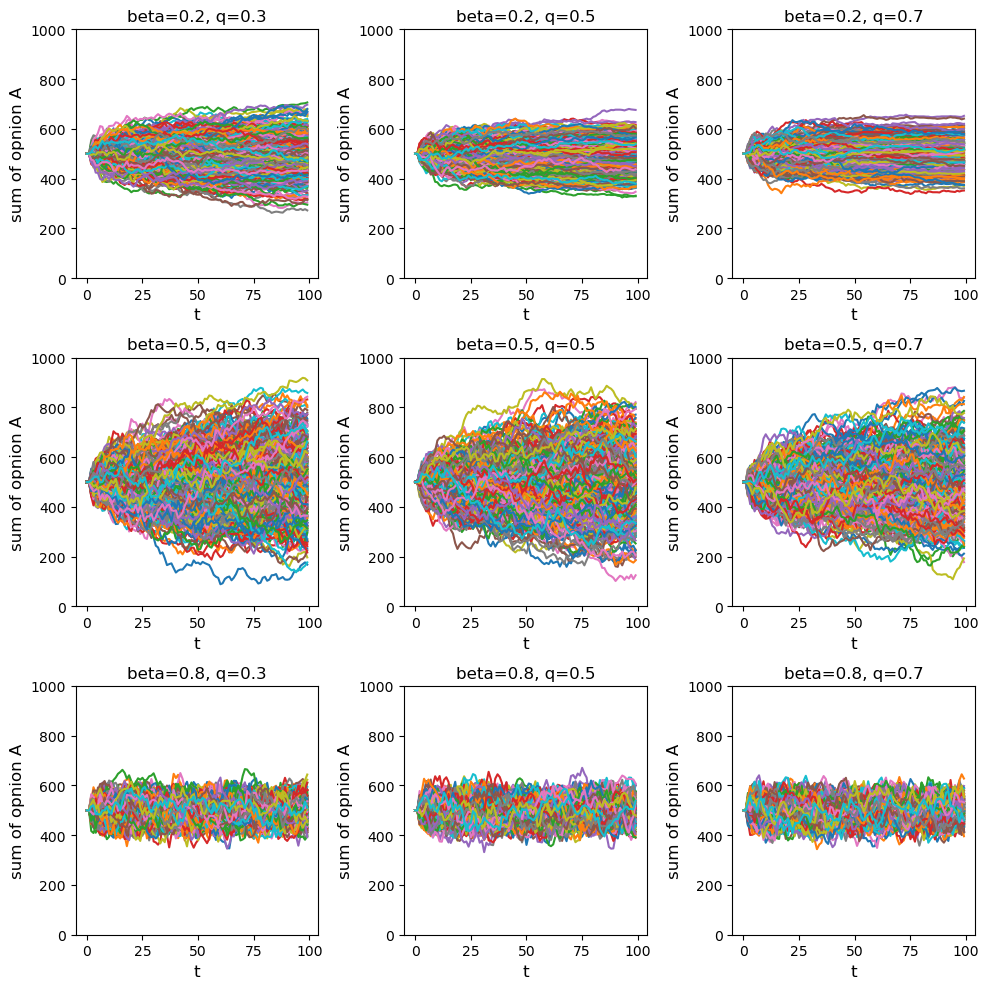

In [49]:
fs=12
ts=10
fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),2):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['sum_opinion_A'][it][:100])
        ax.set_ylabel('sum of opnion A',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,1000))
plt.tight_layout()
plt.savefig('figures/sum_of_A_majority.pdf')
plt.show()
        


In [76]:
len(all_res[i][j]['binned_opinions_home'][0])

30000

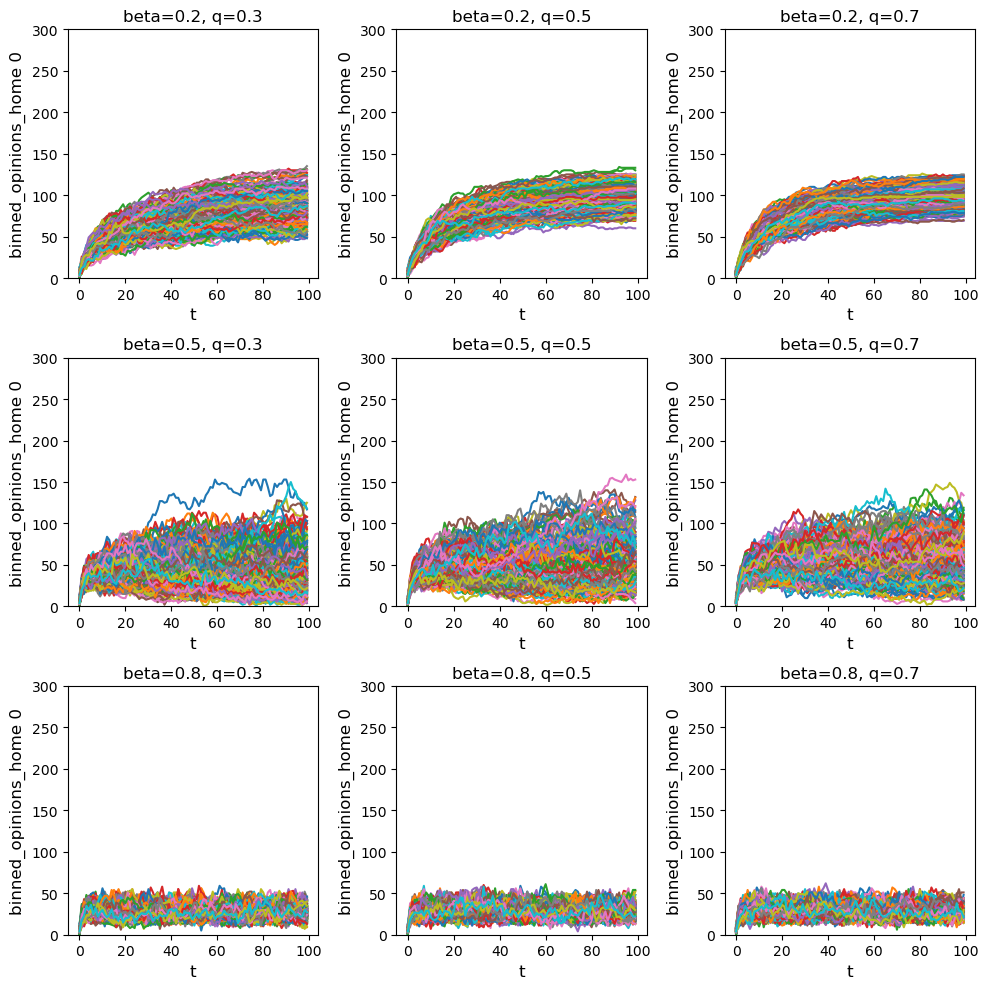

In [45]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),2):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['binned_opinions_home'][0][it])
        ax.set_ylabel('binned_opinions_home 0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,300))
plt.tight_layout()

plt.show()
        


In [151]:
for i in range(0,len(betas),6):
    print(betas[i])

0.2
0.49999999999999994
0.7999999999999998


In [62]:
fs=12
ts=10
def hyperedge_opinions(row='binned_opinions_home', color_i=0, typeofedges='home'):
    fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
    axes=axes.flatten()
    k=0
    for i in range(0,len(betas),6):
        beta=betas[i]
        for j in range(0,len(qs),2):
            results=all_res[i][j]
            ax=axes[k]
            
            q=qs[j]
            
            data_mean=[]
            data_error=[]
            print(beta,q)
            ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
            for l in range(len(results[row])):
                data=[results[row][l][it][-1] for it in range(iterations)]
                m =mean_confidence_interval(data,0.95)
                data_mean.append(m[0])
                data_error.append(2*m[1])
            ax.bar(np.arange(len(results[row])), data_mean, 0.8, label=None, color=colors[color_i],edgecolor = 'black',yerr=data_error, capsize=4,)
            # Customize the second subplot
            ax.set_ylim(0,100)
            if typeofedges=='home':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'# persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(len(results[row])))
                
            elif typeofedges=='workplace':
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'rate of persons on opinion A', fontsize=fs)
                ax.set_xticks(np.arange(0,len(results[row]),2), (np.arange(0,len(results[row]),2)+1)/10)
            else:
                ax.set_ylabel(f'# {typeofedges} hyperedges', fontsize=fs)
                ax.set_xlabel(r'size', fontsize=fs)
                ax.set_xticks(np.arange(len(results[row]))+1)
                ax.set_ylim((0,100))
            ax.tick_params(axis='both', labelsize=ts)# Example categories
            
            k+=1
    plt.tight_layout()

0.2 0.3
0.2 0.5
0.2 0.7000000000000002
0.49999999999999994 0.3
0.49999999999999994 0.5
0.49999999999999994 0.7000000000000002
0.7999999999999998 0.3
0.7999999999999998 0.5
0.7999999999999998 0.7000000000000002


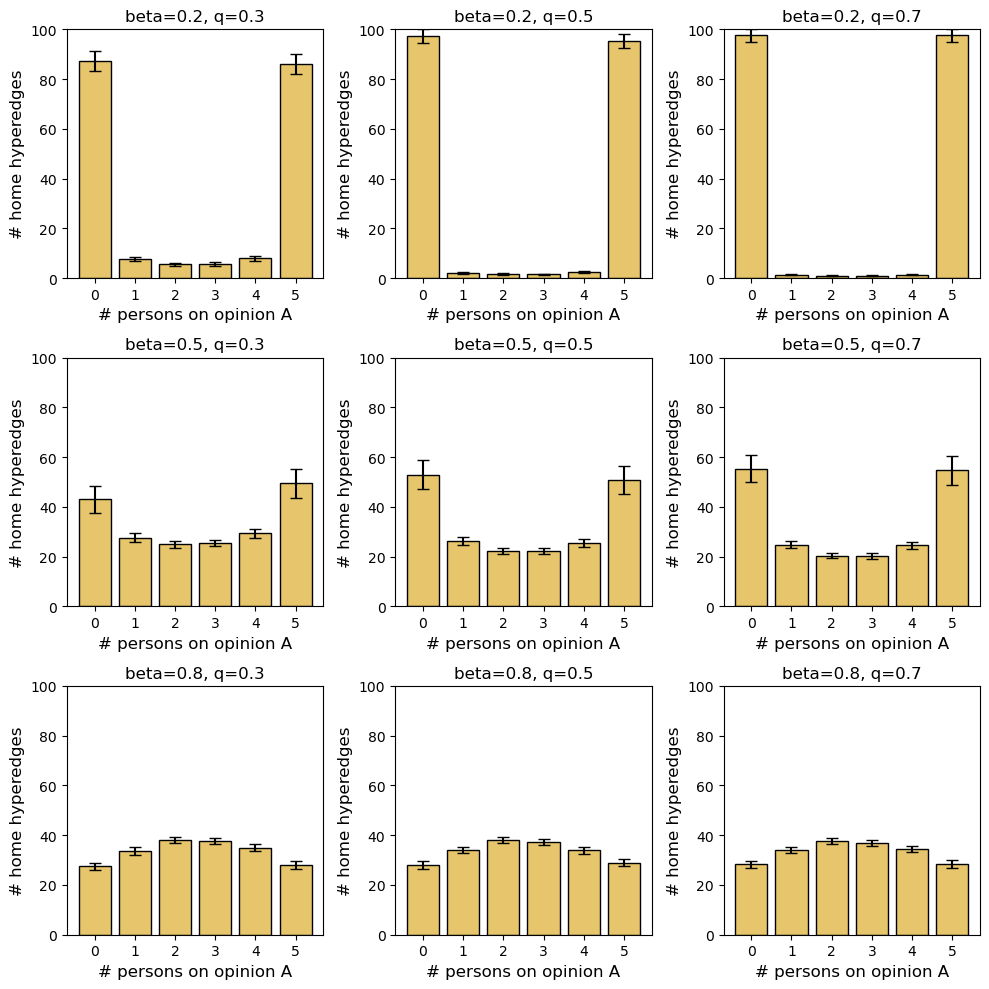

In [50]:
hyperedge_opinions(row='binned_opinions_home', color_i=0)
plt.savefig('figures/binned_opinions_home_majority.pdf')

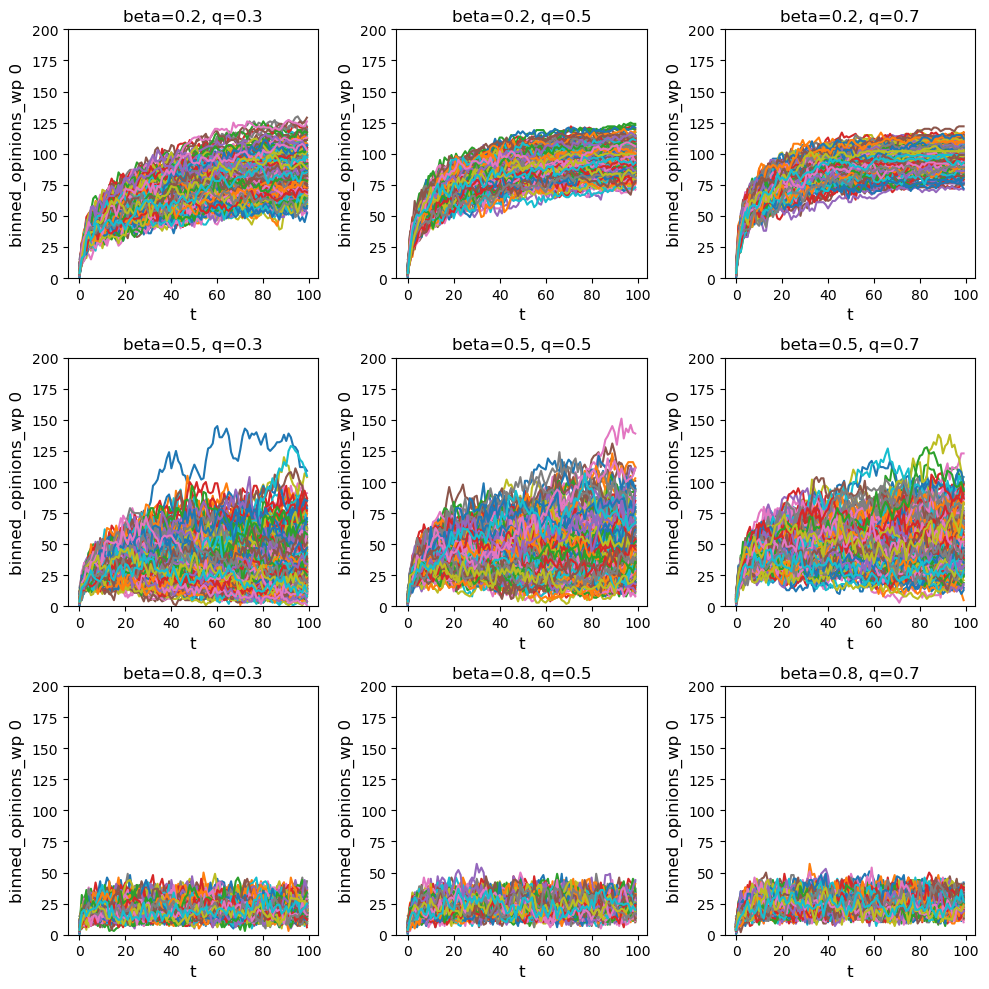

In [43]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),2):
        results=all_res[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['binned_opinions_wp'][0][it])
        ax.set_ylabel('binned_opinions_wp 0',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        ax.set_ylim((0,200))
plt.tight_layout()
plt.show()
        


0.2 0.3
0.2 0.5
0.2 0.7000000000000002
0.49999999999999994 0.3
0.49999999999999994 0.5
0.49999999999999994 0.7000000000000002
0.7999999999999998 0.3
0.7999999999999998 0.5
0.7999999999999998 0.7000000000000002


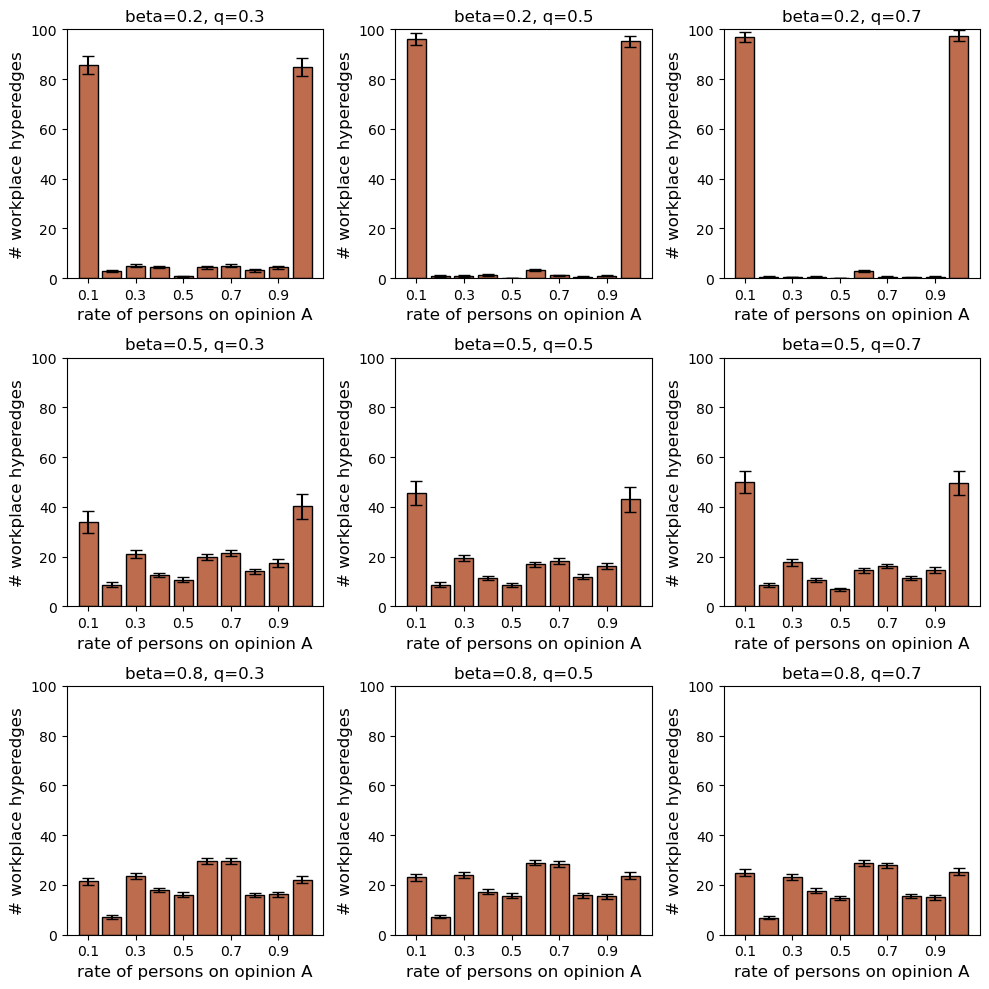

In [51]:
hyperedge_opinions(row='binned_opinions_wp', color_i=1, typeofedges='workplace')
plt.savefig('figures/binned_opinions_wp_majority.pdf')


0.2 0.3
0.2 0.5
0.2 0.7000000000000002
0.49999999999999994 0.3
0.49999999999999994 0.5
0.49999999999999994 0.7000000000000002
0.7999999999999998 0.3
0.7999999999999998 0.5
0.7999999999999998 0.7000000000000002


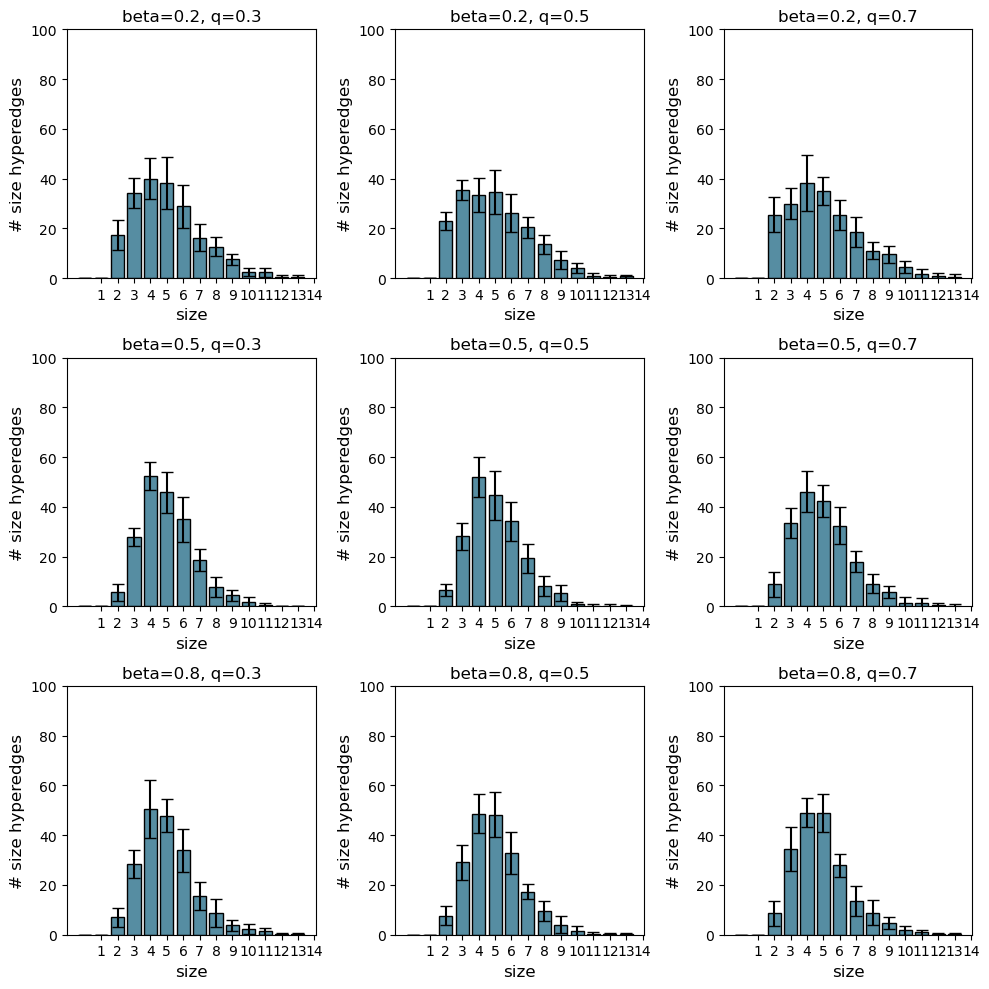

In [63]:
hyperedge_opinions(row='binned_edge_sizes_wp', color_i=2, typeofedges='size')
plt.savefig('figures/binned_edge_sizes_wp_majority.pdf')

In [54]:
data_home ="data/majority_move2/"

In [59]:
all_res2[0][0].keys()

dict_keys(['sum_opinion_A', 'binned_opinions_home', 'binned_opinions_wp', 'binned_edge_sizes_wp', 'move_count', 'op_change_count'])

In [56]:
betas=np.arange(0.2,1.05,0.05)
qs=np.arange(0.3,0.8,0.1)
row_names = ['sum_opinion_A','binned_opinions_home','binned_opinions_wp','binned_edge_sizes_wp', 'move_count', 'op_change_count']
iterations=10

all_res2 = []
for beta_i, beta in enumerate(betas):
    all_res2.append([])
    for q_i,q in enumerate(qs):
        beta_str=str(np.round(beta, 2)).replace('.', '')
        q_str=str(np.round(q, 1)).replace('.', '')
        filename = f"2_regular_edgesize_5_maj_change_beta_{beta_str}_q_{q_str}.csv"
        df = pd.read_csv(data_home + filename)
        
        results={}
        for row_i,row in enumerate(row_names):
            results[row]=[]
            if row != 'sum_opinion_A':
                pdrow=list(df.iloc[[row_i]].values[0])
                for j in range(len(pdrow[2].split(' '))):
                        results[row].append([])
            for i in range(iterations):
                pdrow=list(df.iloc[[i * len(row_names) + row_i]].values[0])        
                if row != 'sum_opinion_A':
                    for j,k in enumerate(pdrow[2].split(' ')):
                        results[row][j].append([])
                    for item in pdrow[2:-1]:
                        for j,k in enumerate(item.split(' ')):
                            results[row][j][i].append(int(k))
                else:
                    try:
                        results[row].append([int(item)for item in pdrow[2:-1]])
                    except:
                        print(i)
                        break
        all_res2[beta_i].append(results)

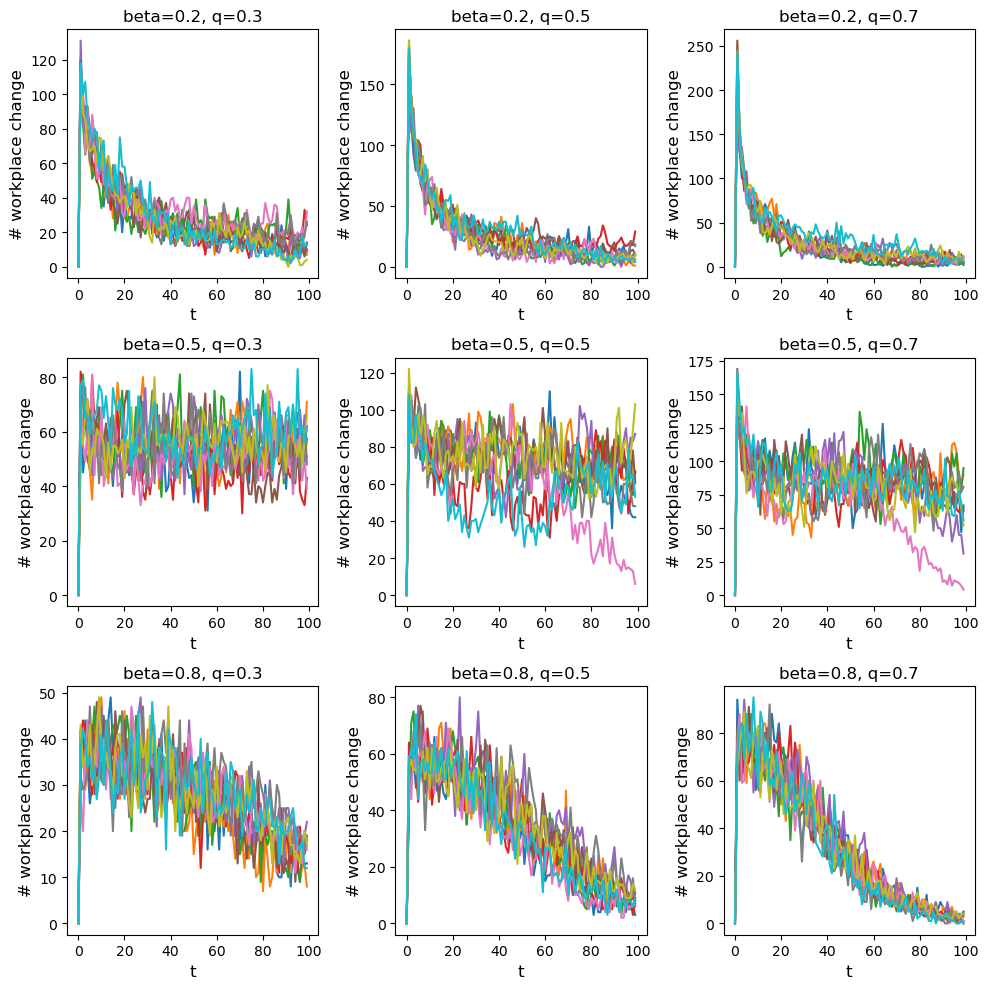

In [65]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),2):
        results=all_res2[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['move_count'][0][it])
        ax.set_ylabel('# workplace change',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        #ax.set_ylim()
plt.tight_layout()
plt.show()
        

In [ ]:
, 'op_change_count'

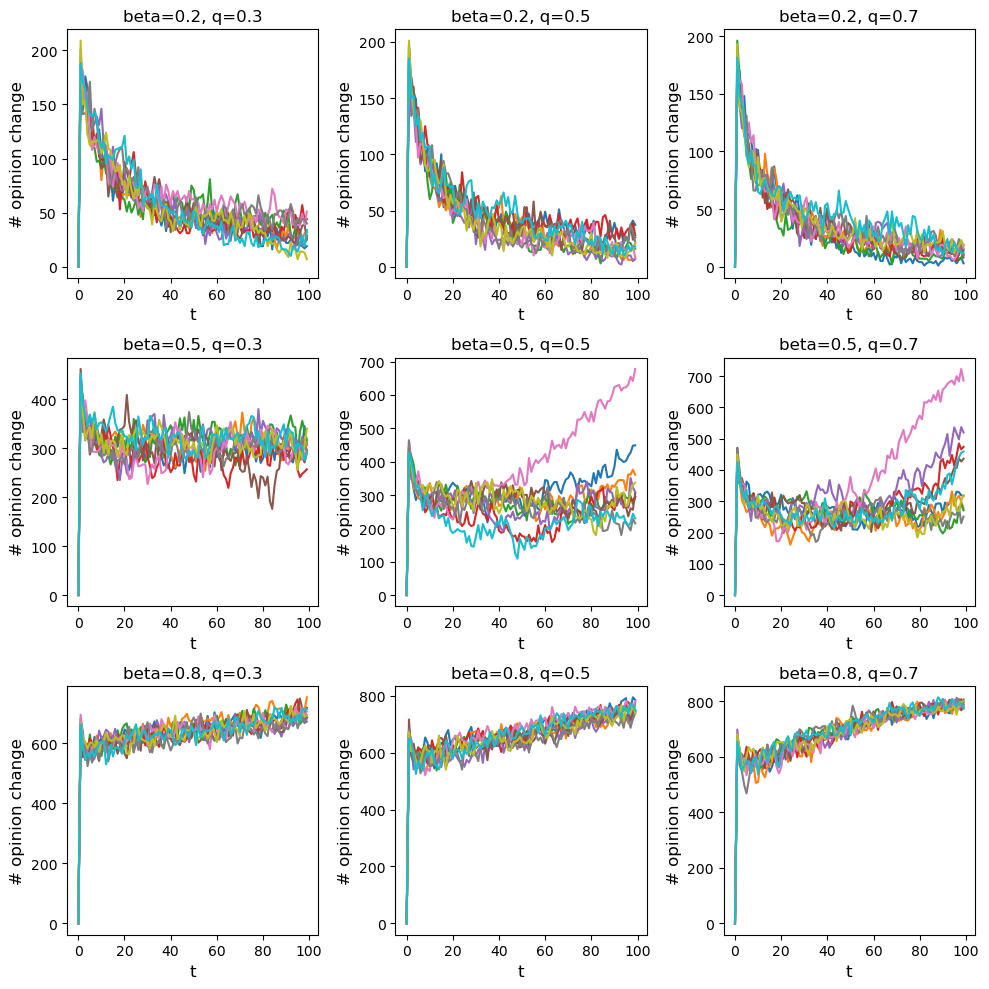

In [66]:
fs=12
ts=10

fig, axes = plt.subplots(len(betas[::6]),len(qs[::2]), figsize=(10,10))
axes=axes.flatten()
k=0
for i in range(0,len(betas),6):
    for j in range(0,len(qs),2):
        results=all_res2[i][j]
        ax=axes[k]
        k+=1
        beta=betas[i]
        q=qs[j]
        
        for it in range(iterations):
            ax.plot(results['op_change_count'][0][it])
        ax.set_ylabel('# opinion change',fontsize=fs)
        ax.set_xlabel('t',fontsize=fs)
        ax.set_title(f'{beta=:.1f}, {q=:.1f}',fontsize=fs)
        ax.tick_params('both', labelsize=ts)
        #ax.set_ylim()
plt.tight_layout()
plt.show()
        